# TMA 01, question 3

**Name**: [Pablo Toledo]
    
**PI**: [C4451553]


In this question, you will examine a set of results of an Open University online quiz (iCMA). These are genuine results from a level 1 module, though the data has been anonymised by using cryptographic hashes to obscure personal information.

The rubric for the iCMA was similar to that for TM351. Students are allowed to take the iCMA as many times as they like, with only their highest score counting. Students have to achieve a threshold score of 40% to pass this iCMA. The iCMA remained open until the module end date. 

The question has several parts, taking you through the data analysis pipeline. Most of the question parts concern with various analyses of the data. The final part of the question looks at some issues with anonymisation of the data.

Record all your activity and observations in this notebook. Generate additional notebook cells as required. 

Ensure that you have made of copy of the TMA01_Question5 Notebook and renamed it so that it has your personal identifier (PI) at the front of the Notebook filename (i.e. YourPI_TMA01_Question5.ipynb). You must submit this notebook as part of your TMA submission.

In [138]:
# Load the necessary libraries here:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# If you require additional libraries to answer any questions 
# then import them as necessary.

## <a name="contents"></a> Contents
* a) [Import and cleaning](#a) (8 marks)
* b) [Number of attempts](#b) (4 marks)
* c) [Timescales](#c) (3 marks)
* d) [Time and day of quiz](#d) (8 marks)
* e) [Difficulty of questions](#e) (7 marks)
* f) [Data investigation summary](#f) (5 marks)
* g) [Anonymisation and privacy](#g) (10 marks)

# <a name="a"></a> a)  Import and cleaning (8 marks) 
([Contents](#contents))

In this part of the question you will load and prepare the data file. You will also quickly examine the data with summaries and visualisations.

Read the csv file `data/icma.csv` into a DataFrame called `icma_df` and display the first 3 rows.

Note that the 'Started on' and 'Completed' columns contain datetimes and should be converted on import. Also not that a single hyphen is used in the file to denote missing numerical data; hyphens should be converted to 'NA' on import.

Also note that it can be easier to see the data if you transpose the dataframe you display: append `.T` to your display function call.

In [154]:
#read icma.csv data into dataframe
icma_df = pd.read_csv('data/icma.csv', parse_dates=['Started on','Completed'], na_values=['-'])
#display first 3 rows
icma_df.head(3).T


834

Check to see how the columns are typed

In [140]:
# Enter your code here.
icma_df.dtypes

Surname                         object
First name                      object
OU Computer Username            object
Personal Identifier             object
Institution                    float64
Department                     float64
Email address                   object
State                           object
Started on              datetime64[ns]
Completed               datetime64[ns]
Time taken                      object
Grade/20.00                    float64
Q. 1 /1.00                     float64
Q. 2 /1.00                     float64
Q. 3 /1.00                     float64
Q. 4 /1.00                     float64
Q. 5 /1.00                     float64
Q. 6 /1.00                     float64
Q. 7 /1.00                     float64
Q. 8 /1.00                     float64
Q. 9 /1.00                     float64
Q. 10 /1.00                    float64
Q. 11 /1.00                    float64
Q. 12 /1.00                    float64
Q. 13 /1.00                    float64
Q. 14 /1.00              

In [141]:
# Recalculate the 'Time taken' values.
icma_df['Time taken'] = icma_df['Completed'] - icma_df['Started on']
icma_df.head(3).T

,0,1,2
Surname,b7a1c60935d72dd330a48021b25ec0c4,8933e77b83eee991c3d3aae3c88b8176,aa8af604652b6b631f11061fe8c69809
First name,34f9e4c9be637c99f9b2cfb3f5d1994c,d3d2792b4f002c766a99bb7152ccf3ee,ec83707bbca209e51a65e9864ac8baeb
OU Computer Username,b675bd4a9a46ec179a894866ad80b71d,5759a8752ba4984049c0be67c7a6270f,b8fe6559c9ba7bd27819a5460c9359c8
Personal Identifier,ec0b15df629ce1fc564462e81ba6b267,7f30f4954957eb71909d7ec30ccb0e0a,4e74dca9c74ad198eeb162dac5193d9e
Institution,NaN,NaN,NaN
Department,NaN,NaN,NaN
Email address,b3d15cf86ba4dbbafa458124c09ca816,ff9114a689c8e5141f46cf1386b5ba9d,ec01fe85557bab32113d8fbb47b0685d
State,Finished,Finished,Finished
Started on,2016-01-29 06:56:00,2016-01-29 09:14:00,2016-01-29 11:16:00
Completed,2016-02-08 10:31:00,2016-01-30 22:10:00,2016-01-29 11:57:00


`describe()` the `icma_df` DataFrame. (Again, you may find the results easier to see if you transpose `.T` the description.)

In [142]:
# Enter your code here.
icma_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Institution,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Department,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time taken,726,16 days 09:30:07.768595,29 days 07:00:03.466198,0 days 00:01:00,0 days 00:35:00,0 days 01:46:00,21 days 18:49:00,154 days 00:58:00
Grade/20.00,726,17.1574,2.75742,1,16.2875,17.765,18.935,20
Q. 1 /1.00,821,0.994348,0.0589023,0,1,1,1,1
Q. 2 /1.00,809,0.949184,0.149324,0,1,1,1,1
Q. 3 /1.00,796,0.895415,0.211043,0,1,1,1,1
Q. 4 /1.00,808,0.884814,0.24743,0,1,1,1,1
Q. 5 /1.00,782,0.903619,0.12584,0,0.89,0.89,1,1
Q. 6 /1.00,761,0.771498,0.247875,0,0.67,0.78,1,1


All iCMA attempts are recorded in the data, whether or not they are finished. The `State` column shows the completion state. What are the different values for State, and how many are in each state? How many questions were answered in each state?

In [143]:
# First we group the table by state, and then apply the count function (we could also use a pivot table
# but the results are the same). 
# If we then transpose the table we can easily see we have 2 kinds of states:'Finished' and 'In progress'
# There are 726 'finished' ones (see Personal Identifier row), and 108 'In progress'
# For each question we can now also see how many questions were answered (e.g. 726 of those students who 
# finished answered question 1, but only 95 who are still in progress have answered question 1)

icma_df.groupby('State').count().T


State,Finished,In progress
Surname,726,108
First name,726,108
OU Computer Username,726,108
Personal Identifier,726,108
Institution,0,0
Department,0,0
Email address,726,108
Started on,726,108
Completed,726,0
Time taken,726,0


Use Pandas `hist()` to generate a histogram of number of tests for each Grade. As the test is out of 20, use 21 bins (0--20 inclusive). Add a suitable title (use `plt.title()`).

array([[<matplotlib.axes._subplots.AxesSubplot object at 0xacfab46c>]], dtype=object)

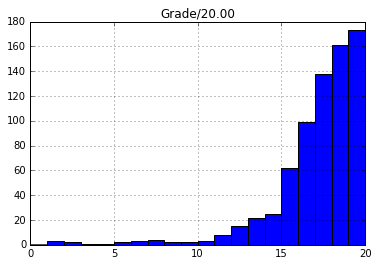

In [144]:
icma_df.hist(column='Grade/20.00', bins=range(21))
#plt.title("Total tests per grade out of 20")

The above shows only completed tests. What are the marks awarded for 'In progress' tests?

Hint: Sum the question scores. You need to tell .sum() to add by row, not column. Use `fillna()` to include rows with no answered questions.

array([<matplotlib.axes._subplots.AxesSubplot object at 0xacf6620c>,
       <matplotlib.axes._subplots.AxesSubplot object at 0xacf228ac>], dtype=object)

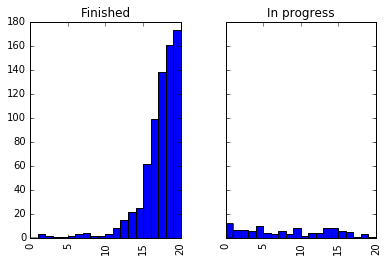

In [145]:
# First, replace all NaNs with 0s, so we can calculate scores for 'in progress' students
icma_df.fillna(0, inplace=True)
# Next, recalculate all the students' scores

#get list of columns, and discard all non-answer columns
answer_columns = list(icma_df)
answer_columns = answer_columns[12:]  

#sum answer columns for each row, and update grade column with result 
icma_df['Grade/20.00'] = icma_df[answer_columns].sum(axis=1) 

#now we can replot the histogram, and also group by state to compare..
icma_df.hist(column='Grade/20.00', bins=range(21), by=['State'], sharey=True)

**Question:** 
What do these tables and charts tell you?  Comment on:

1. the proportion of complete and incomplete quizzes, and which data is present or missing in which state.

1. the range of values for the time taken.

1. the ranges of the overall grade (`Grade/20.00`) and the marks for individual questions (`Q. 1/1.00` to `Q. 20/1.00`).

1. the distribution of marks of complete and incomplete quizzes.

1. the number of questions answered in quizzes.

**Write your answer here** _(200 words)_
Looking at the table which shows the number of questions answered in each state, we can see that 726 students who finished (87%), and 108 who didn't (13%). 

The table of summary statistics shows us that the average time taken to complete a quiz is 16 days, 9 hours. However, the maximum time taken is an enormous 154 days, which is probably skewing the average. This is supported by a large standard deviation (29 days!), suggesting a highly spread out distribution. This probably suggests different study patterns for different students.

While there is a large range in scores for each question (0 to 1 in most cases),
the average score for each question is very high, with only 2 questions (Q18 and Q20) having a mean score of less than 0.75. Interestingly, one would expect the later questions to have lower scores due to being more difficult, but the data doesn't show this, with some extremely high average marks towards the end of the quiz (such as question 16 with an average of 99%!).

In terms of the distribution of marks, we can see from the histogram that the majority of students scored 15 or above, with the average score for all students being 17.16. Students who didn't finish seemed to score higher in the earlier questions. However, we have to bear in mind that we are unable to tell if students genuinely scored lower in later questions, or if this is because they didn't complete the quiz (in which case we've assumed a score of 0).

We can also see differences in how many students attempted a question, and how many gave up. Q1 for instance, was answered by 821 students (98%), compared to Q18 which was only answered by 709 students (83%).


In [146]:
# For convenience, hold the selectors for the completed and incomplete attempts
finished = icma_df['State'] == 'Finished'
in_progress = ~finished

# e.g. icma_df[finished] is just the rows corresponding to finished attempts.

In [147]:
# For convenience, hold a list of column names that store question marks.
question_columns = ['Q. 1 /1.00', 'Q. 2 /1.00',
       'Q. 3 /1.00', 'Q. 4 /1.00', 'Q. 5 /1.00', 'Q. 6 /1.00', 'Q. 7 /1.00',
       'Q. 8 /1.00', 'Q. 9 /1.00', 'Q. 10 /1.00', 'Q. 11 /1.00', 'Q. 12 /1.00',
       'Q. 13 /1.00', 'Q. 14 /1.00', 'Q. 15 /1.00', 'Q. 16 /1.00',
       'Q. 17 /1.00', 'Q. 18 /1.00', 'Q. 19 /1.00', 'Q. 20 /1.00']

# e.g. icma_df[question_columns] is just the columns for the individual questions

Aspects of the data you will explore further are:

1. how many attempts each student has made

2. how the time taken for the iCMAs affects the score

3. times and dates of starting and finishing iCMAs

4. which questions are harder than others

5. summarising these results and indicating interesting aspects

6. anonymity and privacy of the data

# <a name="b"></a>b) Number of attempts (4 marks)
([Contents](#contents))

Students can make multiple attempts at a quiz. In this part of the question, you will see how many attempts different students made.

Count the number of attempts by each student.

Store the results in a new data frame, `attempt_counts_df`. This new dataframe should have one row for each student, with the columns showing the number of quiz attempts for that student.

In [148]:
# Enter your code here


Group `attempt_counts_df` by `Completed` to show the number of students who completed each number of quizzes. (For example, how many students completed no quiz attempts, how many completed 3 attempts, and so on.) Give both the numerical results and a bar chart visualisation.

In [149]:
# Enter your code here


Find the PIs of students that completed the quiz more than five times, and how many times they completed the quiz. Display the results in order of number of completed quizzes.

In [150]:
# Enter your code here


Find the PI of the student who completed the most number of quizzes. Show the datetime and overall grade of their attempts, in datetime order.

In [151]:
# Enter your code here


Many students started a quiz but did not complete any. What would their scores have been if they had pressed the "submit" button on the quiz? Plot the results as a histogram (with 21 bins).

First, find the PIs of students with zero completed quizzes. 

_Hint:_ The Personal Identifier is the `index` of the `attempt_counts` DataFrame. Store the relevant Personal Identifiers in a variable called `zero_attempted`.

In [152]:
# Enter your code here


The code below will select the rows of the `icma_df` DataFrame where the Personal Identifier is in the `zero_attempted` set you just identified. Use it to find the scores each of these quiz attempts would have been awarded had the student simply pressed 'submit'. Plot those results as a histogram (with 21 bins).

Ensure you find the total per student, not the total per question.

In [153]:
unsubmitted_attempts = icma_df[icma_df['Personal Identifier'].isin(zero_attempted)]
unsubmitted_attempts

NameError: name 'zero_attempted' is not defined

In [ ]:
# Enter your code here


## Analysis
What do these graphs and data extracts tell you about how students take quizzes?

**Write your answer here** _(100 words)_


# <a name="c"></a> c) Timescales (3 marks)
([Contents](#contents))

Does the time taken to complete a quiz have any bearing on the score for that quiz attempt? In other words, does taking your time over a quiz lead to a higher mark, or vice versa?

Add a new column to the `icma_df` DataFrame that holds the number of hours for that quiz attempt. 

The 'Time taken' data are `timedelta` objects. The `.total_seconds()` method of `timedelta` gives the number of seconds in that time interval. You will need to `.apply()` that function to every row of the `icma_df` DataFrame.

`describe` the distribution of times. Plot a histogram of number of quiz attempts against time taken.

In [ ]:
# Enter your code here


In [ ]:
# Enter your code here


Many quizzes are completed quickly. How many are completed in less than two hours? Plot a histogram of number of quizzes completed by time. Include only the quizzes completed in less than two hours, and use 40 bins to show the detail.

In [ ]:
# Enter your code here


In [ ]:
# Enter your code here


Plot scatter plots of time taken against grade, for all attempts and for attempts completed within two hours.

In [ ]:
# Enter your code here


In [ ]:
# Enter your code here


## Analysis
What does these plots and summaries of the data tell you about how the time to complete a quiz affects the score of that quiz?

**Write your answer here** _(100 words)_


# <a name="d"></a> d) Time and day of quiz (8 marks)
([Contents](#contents))

Does when a quiz is started or finished have any effect on its grade?

_Pandas_ doesn't like making scatter plots with time as one axis. This code will convert the start time of a quiz into an integer (number of seconds), add it to the `icma_df` DataFrame, then draw a scatter plot.

In [ ]:
icma_df['Start'] = icma_df['Started on'].astype(np.int64)
icma_df.plot.scatter(x='Start', y='Grade/20.00')

Make a scatter plot of completion time against score.

In [ ]:
# Enter your code here


In [ ]:
# The following line of code maps dates to day of the week with Monday=0, Sunday=6
icma_df['DoW'] = icma_df['Started on'].dt.weekday
icma_df[:3].T

How many quiz attempts were started on each day of the week? What were the average scores of those completed quiz attempts?

Show the numeric results of each of these questions, and produce a bar chart of the results.

Make a scatter plot of day of week against score.

In [ ]:
# Show the number of quizzes started on each day of the week.
# Enter your code here


In [ ]:
# Plot the results above as a bar chart.
# Enter your code here


In [ ]:
# Show the mean score of quizzes started on each day of the week.
# Enter your code here


In [ ]:
# Plot the results above as a bar chart.
# Enter your code here


In [ ]:
# Plot the results above as a scatter chart, of grade against day of week.
# Enter your code here


Perform the same analysis for time of day. Find the hour that each quiz was started, and give numerical and graphical representations of the number of quizzes completed each hour and their average score. Use intermediate steps as needed.

In [ ]:
# Enter your code here


Do the complete and incomplete quiz attempts have a different distribution of starting times?

Generate two plots in one figure, with the finished quiz times above the in-progress quiz times. Give each plot a title and perhaps a different colour. (Keeping calls of 
```
plt.tight_layout()
fig.subplots_adjust(top=0.90)
```
to the very end of your code cell can improve the layout.)

Use `reindex()` and `fillna()` to fill in any missing groups so that both graphs have the same number of data points.

In [ ]:
fig = plt.figure(figsize=(8, 8))
fig.suptitle("Attempts by hour", fontsize='x-large')

# Enter your code here

# Keep these lines at the end
plt.tight_layout()
fig.subplots_adjust(top=0.90)

## Analysis
What does these plots and summaries of the data tell you about how the time of day quiz affects the score of that quiz?

**Write your answer here** _(150 words)_


# <a name="e"></a> e) Difficulty of questions (7 marks)
([Contents](#contents))

Which questions are harder? 

Note that we can judge difficulty in two ways: lower grades for particular questions, or fewer questions answered (students tend to avoid questions they perceive as difficult).

Generate graphs to show the number of scores for each question. Generate three graphs, for all attempts, completed quizzes, and in-progress quizzes. 

Plot the three graphs, one above the other, in one figure. Give each subplot a title and use different colours for each plot. Again, `plt.tight_layout()` and `fig.subplots_adjust()` may improve the appearance.

In [ ]:
fig = plt.figure(figsize=(8, 10)) # Make the whole figure big enough to see the individual graphs.

fig.suptitle("Number of attempts", fontsize='x-large')

# Enter your code here


Create a scatter plot that shows the number of questions answered (_x_ axis) against the grade for that quiz attempt (_y_ axis). You may find it easier to add a column to the `icma_df` DataFrame to store the number of attempted questions.

In [ ]:
# Enter your code here


Similar to the counts above, produce three charts that show the mean scores for each question. You should have one graph for all attempts, one for completed attemtps, and one for in-progress attempts. Ensure you are taking the average per question, not the score per attempt.

In [ ]:
fig = plt.figure(figsize=(8, 10)) # Make the whole figure big enough to see the individual graphs.

fig.suptitle("Mean scores", fontsize='x-large')

# Enter your code here


Generate a bar chart that shows two columns for each question. One column should show the number of attempts at that question, the other column should show the mean score. You should rescale the number of question attempts to fit the range 0–1 so that the two types of data a visible on the same graph. 

Use only data from completed quiz attempts.

You may need to generate intermediate DataFrames as you go. 

In [ ]:
# Enter your code here


## Analysis
What does these plots and summaries of the data tell you about which questions are harder?

**Write your answer here** _(150 words)_


# <a name="f"></a> f) Data investigation summary (5 marks)
([Contents](#contents))

Look back over the analysis you have produced. Summarise the main conclusions you have drawn from this work. Highlight how different results can be combined to deduce more about the dataset. Take note of these questions:

* What conclusions can you draw about how and when students answer the iCMAs, and any effects that may have on the quiz grade? 

* What are the differences between the completed and in progress quiz attempts?

If you were extending this exploration, how might you proceed? 

**Write your answer here**  _(400 words)_



# <a name="g"></a> g) Anonymisation and privacy (10 marks)
([Contents](#contents))

The raw data for this question contained students' full names, personal email addresses, OU computer usernames, and personal identifiers. Open University students, as part of their registration agreement, give permission to The Open University for their personal data to be used internally for analysis and research.

## i) (4 marks)
What issues would there be in releasing this data for analysis by TM351 students? What laws would govern the disclosure of this data, and would unredacted data release be legal? In what way are full names, email addresses, OU computer usernames, and personal identifiers "personal data"? What other information in the dataset could be used to identify individuals?

Justify your answers.

**Write your answer here**  _(300 words)_


## ii) (4 marks)
One approach to obscuring the data is to use a cryptographic hash function, such as MD5. Such a hash function is deterministic (each value always results in the same hash), one-way (the original value cannot be recovered from the hashed value), and collision-free (two different values will not generate the same hashed value). See the examples below:

In [ ]:
import hashlib

print('TM351', hashlib.md5('TM351'.encode('ascii','ignore')).hexdigest())
print('TM352', hashlib.md5('TM352'.encode('ascii','ignore')).hexdigest())
print('tm351', hashlib.md5('tm351'.encode('ascii','ignore')).hexdigest())

This technique could be used easily with the iCMA data by applying such a hash function to some of the data (name, email address, personal identifier, OU username) and only releasing the hashed values. 

What form of anonymisation is this? 

What are the advantages and disadvantages of this approach? How could data, obscured in this way, be used to deanonyimise some or all of the data? 

(For information, the data in this released dataset had the personal identifiers replaced (masked) by randomly-generated keys. Nonce values for other personal information were generated deterministically from the new personal identifiers. These values were then hashed and stored.)

**Write your answer here**  _(250 words)_



## iii) (2 marks)
Give two other approaches that could be used to anonymise the iCMA data so it could be published for analysis? What are their disadvantages?

**Write your answer here**  _(200 words)_


### 45 marks in total